In [1]:
#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime as dt
from sklearn import tree
import pydotplus
from IPython.display import Image
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, time

In [3]:
#read in the cvs
df=pd.read_csv('/Users/semanur/Desktop/Module23_24/fraud_test_extended.csv')

In [4]:
#check dataframe
df.head()

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,date_dob,dt_trans_date_time,age_years,distance_km,region
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,1968-03-19,2020-06-21 12:14:00,56.116397,1.551148,Southeast
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,1990-01-17,2020-06-21 12:14:00,34.269822,1.666594,Rocky Mountain
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,1970-10-21,2020-06-21 12:14:00,53.524616,1.387472,Mideast
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,1987-07-25,2020-06-21 12:15:00,36.754753,1.599663,Southeast
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,1955-07-06,2020-06-21 12:15:00,68.828726,1.408470,Great Lakes


In [5]:
#check data shape
df.shape

(555719, 28)

In [6]:
#check column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
#Transacrtions per State

state_count = df['state'].value_counts()
print(state_count)

state
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64


# 4.1.1 GEOGRAPHICAL ANALYSIS:  
What are the most common states for card holders.

As seen in the following bargraph; most common states for card holders are Texas, New York and Pennsylvania among others.  This could be due to the size and population of the sates; bigger states has more population and more population equates to more merchants and transactions.  Smaller states might have less Merchants and less population equating to less transactions. 4 of the top 5 states by transaction are in the top 5 states by population. the only state not in the top 5 by transaction is Florida despite that its the 3rd state for population. Maybe this company operates less in this state.

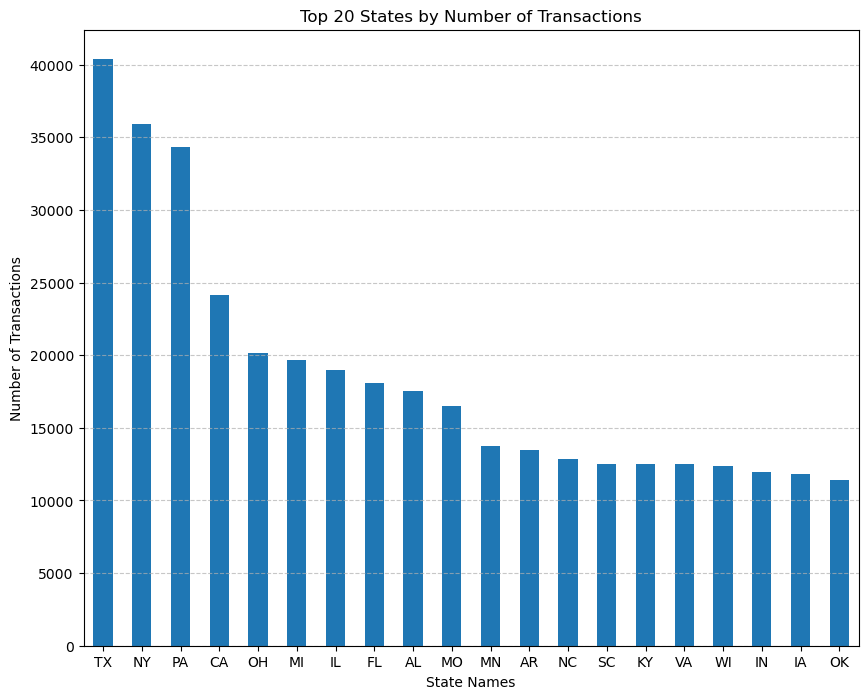

In [8]:
# 4.1.1 Top 20 states by Number of Transaction in bargraph

state_top = state_count.head(20)
plt.figure(figsize = (10,8))
state_top.plot(kind='bar')
plt.title ('Top 20 States by Number of Transactions')
plt.xlabel('State Names')
plt.ylabel ('Number of Transactions')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [9]:
#Data grouping by city & state

city_count = df.groupby(['city', 'state'])['city'].value_counts().sort_values(ascending = False)
print (city_count)

city          state
Phoenix       AZ       2222
San Antonio   TX       2182
Indianapolis  IN       1765
Houston       TX       1697
Naples        FL       1694
                       ... 
Seligman      MO         10
Guthrie       OK          9
Seattle       WA          9
Rice          MN          8
Wever         IA          6
Name: count, Length: 880, dtype: int64


# 4.1.2 GEOGRAPHICAL ANALYSIS:
What are the most common cities for cardholders?

As seen in the following bargraph; most common cities for card holders are Phoenix, San Antonio and Indianapolis.
Initially I thought the larger the city greater the transactions however our top 3 citites are not larger by population. which suggests a weak coorelation between population and transaction counts.


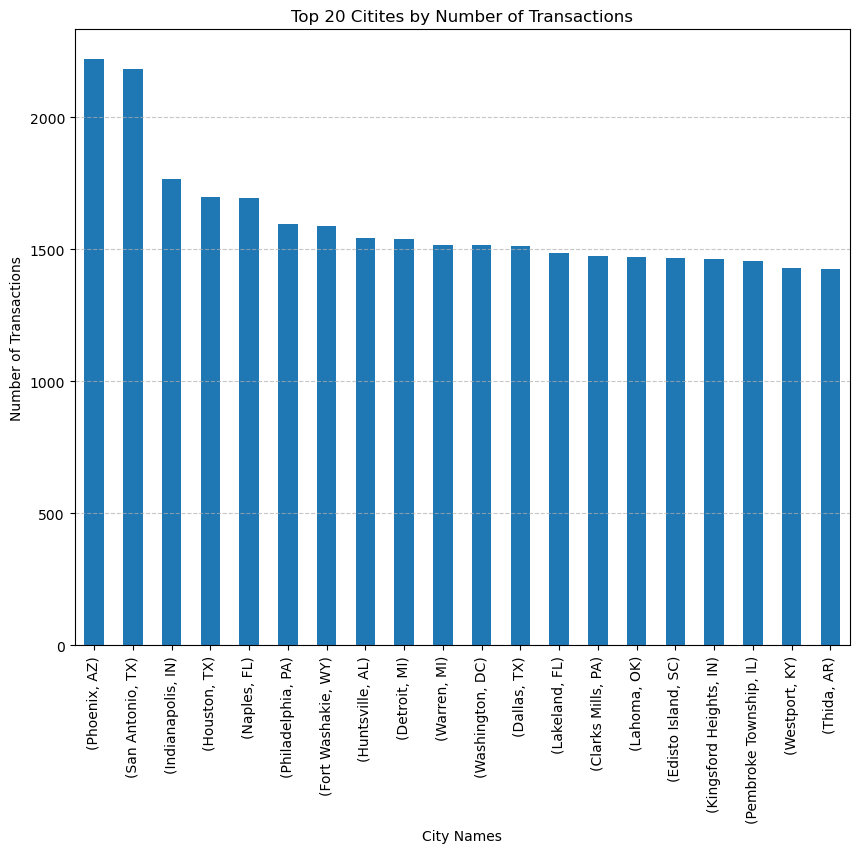

In [10]:
# Top 20 Cities by Number of Transactions

city_top = city_count.head(20)
plt.figure(figsize = (10,8))
city_top.plot(kind='bar')
plt.title('Top 20 Citites by Number of Transactions')
plt.xlabel('City Names')
plt.ylabel ('Number of Transactions')

plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [11]:
#Data Grouping by city

city_group_df = df.groupby(['city', 'state', 'city_pop', 'long', 'lat']).size().reset_index(name='number_of_transactions')
city_group_df.head(10)


,city,state,city_pop,long,lat,number_of_transactions
0,Achille,OK,608,-96.3648,33.8396,208
1,Acworth,NH,477,-72.3001,43.1960,828
2,Adams,WI,3508,-89.8219,43.8967,223
3,Afton,MI,937,-84.4695,45.3637,436
4,Afton,MN,2916,-92.8234,44.8696,461
5,Akron,OH,272134,-81.5488,41.0695,222
6,Albany,NY,151022,-73.8253,42.6853,423
7,Albuquerque,NM,641349,-106.5690,35.1506,233
8,Albuquerque,NM,641349,-106.5506,35.0561,221
9,Alder,MT,286,-112.0568,45.1939,441


In [12]:
#List of Fraud per city

city_group_fraud_df = df[df["is_fraud"]==1].groupby(['city', 'state', 'city_pop','lat','long']).size().reset_index(name='number_of_transactions')
city_group_fraud_df.head(2000000)

,city,state,city_pop,lat,long,number_of_transactions
0,Adams,WI,3508,43.8967,-89.8219,12
1,Afton,MI,937,45.3637,-84.4695,7
2,Akron,OH,272134,41.0695,-81.5488,9
3,Allentown,GA,112,32.6064,-83.2095,13
4,Andrews,IN,2304,40.8618,-85.6067,5
...,...,...,...,...,...,...
213,Whittemore,IA,912,43.0261,-94.4064,15
214,Williams,IN,1735,38.7735,-86.6285,9
215,Wilton,ND,1190,47.1709,-100.7944,11
216,Woodville,AL,3395,34.6689,-86.2296,10


# 4.2 GEOGRAPHICAL ANALYSIS:
How does the population size of cities correlate with transaction volume?

Initially we thought as city's population grew there would be more transactions but the bar graph above didnt suggest that. In the scatter plot below showing the relation ship between population and transactions in a city, this validates the idea that there isnt a strong correlation between those two values. Scatter plot shows that there seems to be bands of transaction amounts where there many cities that total for example 200 or 650 transactions regardless of the population.



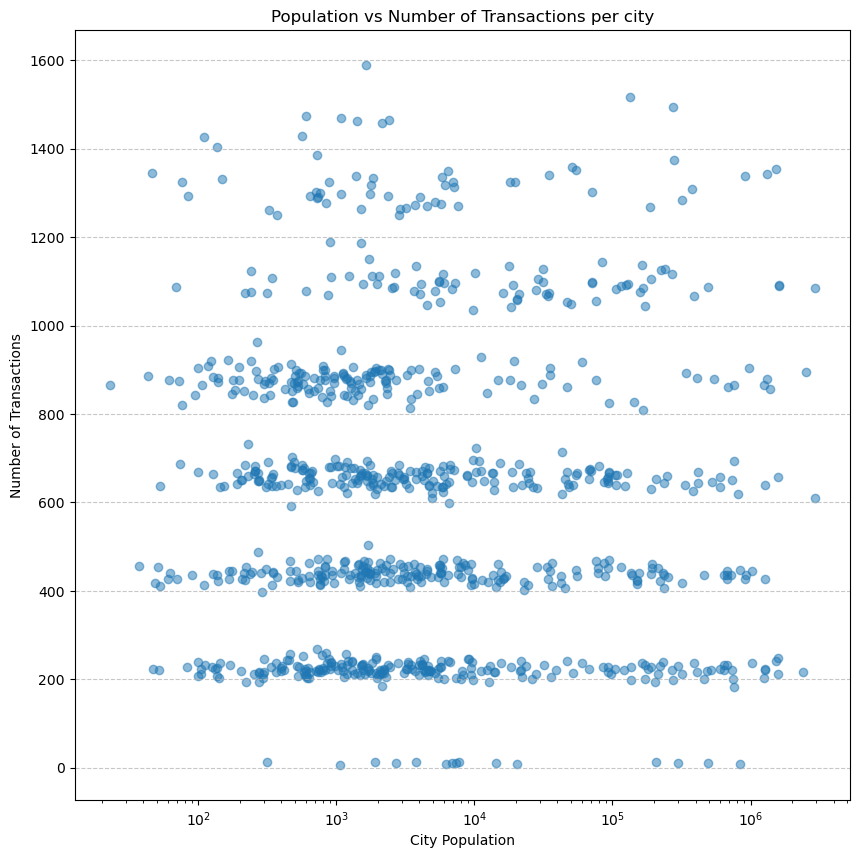

In [13]:
# Population vs Number of Transactions per City

plt.figure(figsize = (10,10))
plt.scatter(city_group_df['city_pop'],city_group_df['number_of_transactions'],alpha=0.5)

plt.title('Population vs Number of Transactions per city')
plt.xlabel('City Population')
plt.ylabel ('Number of Transactions')
plt.xscale('log')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

# 4.3 GEOGRAPHICAL ANALYSIS:
Are there any geogaphical patterns in transaction amounts or types?

As seen in the map below, most transactions are in the East of the country where population density is higher than the west.
There is a relationship between population density of an area and where transactions occur.


In [14]:
%%capture --no-display
# Configure the map plot

map_plot2 = city_group_df.hvplot.points(
    "long",
    "lat",
    hover_cols=["city", "number_of_transactions"],
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = city_group_df ["number_of_transactions"]**0.75,
    alpha=.75 
)

# Display the map
map_plot2

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (_size,city,number_of_transactions)

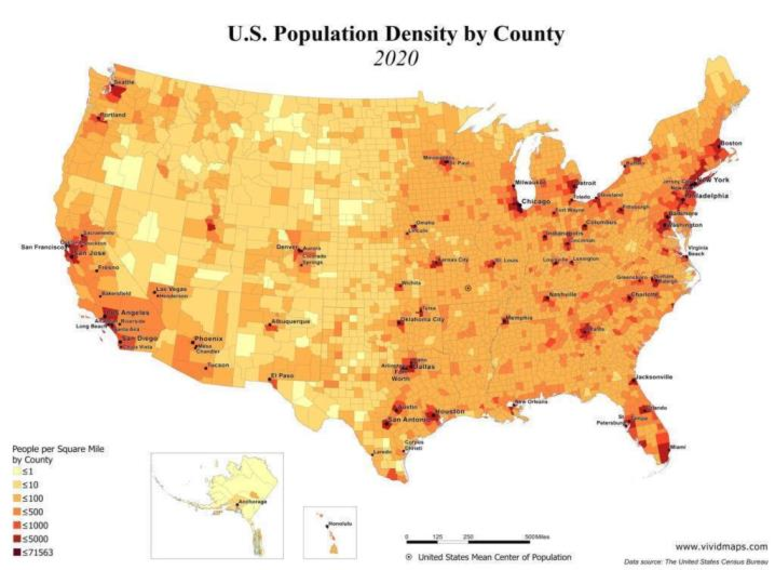







In [15]:
#Transactions per Merchant
merchant_count = df['merchant'].value_counts()
print(merchant_count)

merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64


# 5.1 MERCHANT ANALYSIS:
What are the most common merchants involved in transactions?

Most common merchants involved in transactions are Kilback LLC, Cormier LLC, Schumm PLC followed by others.  This could be due to the size of the merchant as well as its location. 


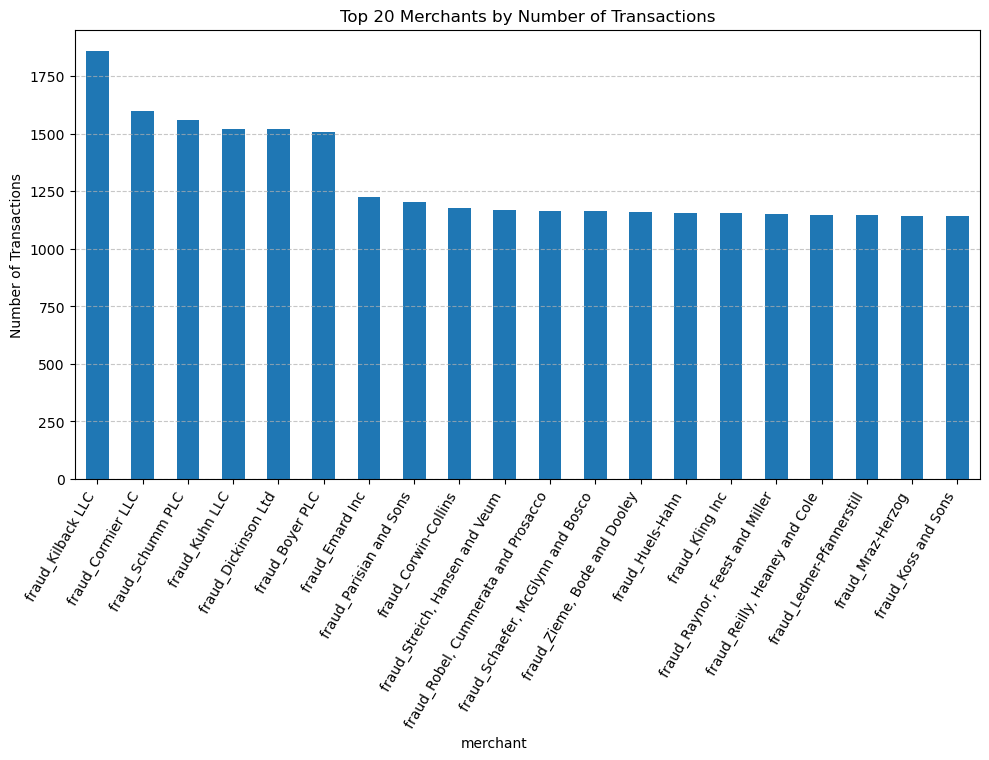

In [16]:
# Top 20 merchants by Number of Transaction in bargraph

merchant_top = merchant_count.head(20)
plt.figure(figsize = (10,8))
merchant_top.plot(kind='bar')
plt.title('Top 20 Merchants by Number of Transactions')
plt.xlabel('merchant', ha="right", va="top")
plt.ylabel ('Number of Transactions')
plt.tight_layout()
plt.xticks (rotation=60, ha="right", va="top")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()


In [17]:
# 5.2 MERCHANT ANALYSIS

avg_merchant = df.groupby('merchant')['amt'].mean()
avg_merchant = avg_merchant.sort_values(ascending = False).head(10)
print (avg_merchant)

merchant
fraud_Kovacek Ltd                        180.861014
fraud_Douglas, DuBuque and McKenzie      166.434264
fraud_Boyer-Haley                        164.956522
fraud_Romaguera and Sons                 164.088443
fraud_Hahn, Douglas and Schowalter       157.028599
fraud_Ankunding-Carroll                  156.182605
fraud_Mosciski Group                     153.999478
fraud_Kozey-McDermott                    145.761301
fraud_Corwin-Romaguera                   142.618455
fraud_Ritchie, Bradtke and Stiedemann    135.148783
Name: amt, dtype: float64


In [18]:
avg_merchant = avg_merchant.index.tolist()
top_merchant_df = df[df['merchant'].isin(avg_merchant)]
top_merchant_df

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,date_dob,dt_trans_date_time,age_years,distance_km,region
20,20,21/06/2020 12:20,2.283740e+15,fraud_Corwin-Romaguera,travel,8.53,Shannon,Williams,F,9345 Spencer Junctions Suite 183,...,1650f4f052cc85af7bd417fa17d59ac5,1371817234,33.195225,-84.119083,0,1997-12-27,2020-06-21 12:20:00,26.321877,1.582084,Southeast
123,123,21/06/2020 12:53,3.546670e+15,fraud_Corwin-Romaguera,travel,6.85,Jordan,May,M,1626 Susan Course,...,cabf90039e8dad0f7b6627b4f9923008,1371819228,33.268393,-98.423050,0,1984-07-05,2020-06-21 12:53:00,39.809548,1.743264,Southwest
283,283,21/06/2020 13:50,4.503100e+18,"fraud_Douglas, DuBuque and McKenzie",travel,2.40,Katherine,Tucker,F,670 Le Meadows Suite 250,...,fe05feb7043169c18f54d689b26984ea,1371822612,27.852817,-81.151943,0,1979-07-03,2020-06-21 13:50:00,44.820507,1.605813,Southeast
288,288,21/06/2020 13:52,4.302480e+15,fraud_Kozey-McDermott,travel,2.91,David,Rodriguez,M,821 Solis Points,...,56639740dd1bfeeb2493084fa70b0b7b,1371822732,43.666893,-85.285981,0,1995-05-25,2020-06-21 13:52:00,28.916397,1.428710,Great Lakes
334,334,21/06/2020 14:07,4.538570e+12,"fraud_Hahn, Douglas and Schowalter",travel,7.40,Jerry,Kelly,M,3539 Mckenzie Stream,...,f5d5b615219b84592deb6b63a606d7c4,1371823625,40.890387,-74.847067,0,1967-05-28,2020-06-21 14:07:00,56.927356,1.390373,Mideast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555304,555304,31/12/2020 21:33,4.769430e+18,fraud_Kozey-McDermott,travel,6.86,Andrea,Cruz,F,26572 Hodge Villages Suite 512,...,8381fce0e1e6d1a4af524debebc7a109,1388525631,40.974854,-77.357943,0,1954-08-22,2020-12-31 21:33:00,69.699959,1.416078,Mideast
555317,555317,31/12/2020 21:38,4.642890e+12,"fraud_Douglas, DuBuque and McKenzie",travel,454.44,Eddie,Mendez,M,1831 Faith View Suite 653,...,ebb5e566b7f61e0f63e55b42a743db9e,1388525908,40.953463,-95.364155,0,1990-07-13,2020-12-31 21:38:00,33.784890,1.556724,Plains
555335,555335,31/12/2020 21:43,2.131120e+14,fraud_Kovacek Ltd,travel,1.46,Ana,Howell,F,4664 Sanchez Common Suite 930,...,7bd46cdf55eaf8b5fa127518867c2d1c,1388526201,33.572731,-82.246918,0,1984-06-03,2020-12-31 21:43:00,39.897219,1.562034,Southeast
555460,555460,31/12/2020 22:24,3.429520e+14,fraud_Mosciski Group,travel,6.03,Kayla,Jones,F,6033 Young Track Suite 804,...,aa6d1f4a1056f168676816145f3dd2f1,1388528678,42.668599,-72.385026,0,1987-09-26,2020-12-31 22:24:00,36.582151,1.346611,New England


# 5.2 MERCHANT ANALYSIS:
How do transaction amounts vary across different merchants

The box plot below shows top 10 Merchants with the highest average transaction amount. I excluded the outliers for better visualization.  All of the medians for these merchants are very similar, all the medians are around \\$6-\\$7 dollars. The middle 50% of transactions are all similiar as well ranging roughly around \\$4-\\$9. All of the bottom lines start at about \\$1 suggesting lowest priced good at all these places is \\$1. THe top 25% of all transactions are can vary a lot by merchant.  The top lines show that maximum price is at \\$9-\\$17. None of the top 20 from above bargraph are in the top 10 in below boxplot, suggesting that most popular merchants are not the most expensive. For example nofrills would have more transactions than Guess but nofrills transaction coulbe be smaller in amount compared to Guess.



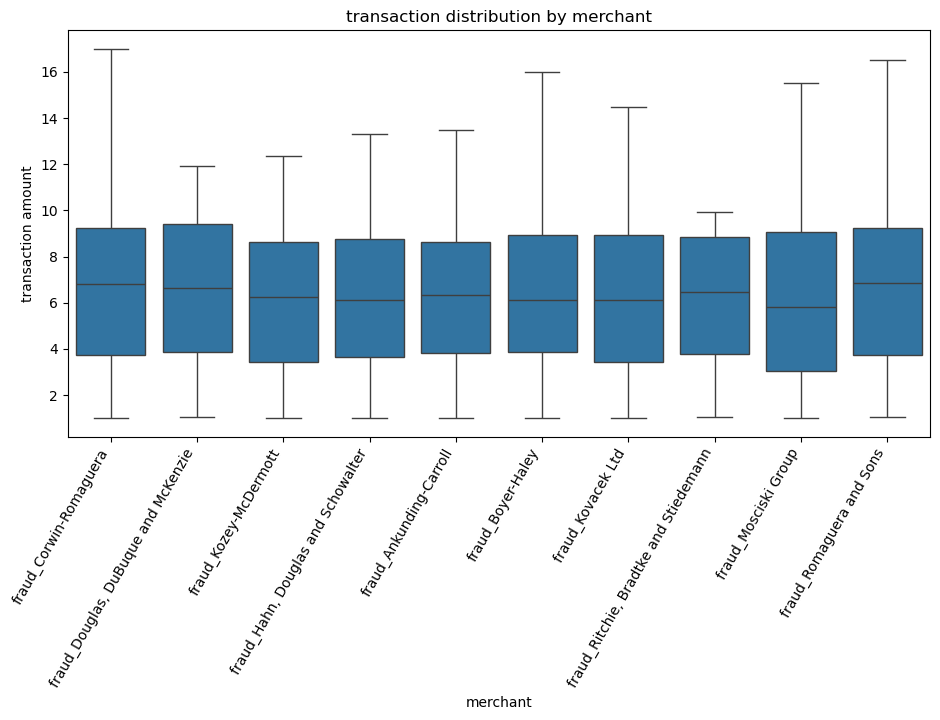

In [19]:
#How do transaction amounts vary across different merchants

plt.figure(figsize= (10,5))
sns.boxplot(data=top_merchant_df, x='merchant', y='amt', showfliers=False)
plt.xlabel('merchant')
plt.ylabel('transaction amount')
plt.title ('transaction distribution by merchant')
plt.tight_layout()
plt.xticks (rotation=60, ha="right", va="top")
plt.show()


# 5.3 MERCHANT ANALYSIS:
Are there any trends or patterns in the location of merchants?

Regardless of where you are average, transaction will be roughly the same. from below bar graph and the list of Fraud per region we can see that there isnt seem to be a relationship between average transation and fraud per region. Mid east is where most fradulent transactions and Rocky Mountain the least amount of fradulent charges.

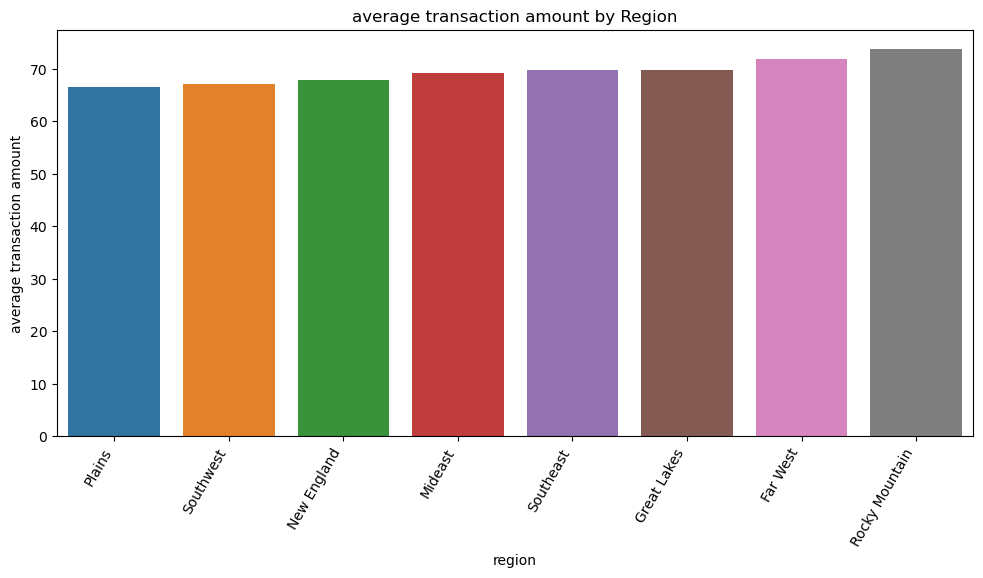

In [20]:
#Trends and patterns in the locations of merchants by region

avg_region = df.groupby('region')['amt'].mean().reset_index().sort_values(by = 'amt')
std_region= df.groupby('region')['amt'].std().reset_index()

plt.figure(figsize= (10,5))
sns.barplot(data=avg_region, x='region', y='amt', hue='region')
plt.xlabel('region')
plt.ylabel('average transaction amount')
plt.title ('average transaction amount by Region')
plt.tight_layout()
plt.xticks (rotation=60, ha="right", va="top")
plt.show()

# List of Fraud per region

Most of the Fradulent transactions appear to be in Mideast, Great Lakes and Southeast regions while the least fradulent transactions are in Rocky Mountain.

In [21]:
# List of Fraud per region

region_group_fraud_df = df[df["is_fraud"]==1].groupby(['region']).size().reset_index(name='number_of_transactions')
region_group_fraud_df = region_group_fraud_df.sort_values(by = 'number_of_transactions', ascending = False)
# region_group_fraud_df.head(100)

# Fradulent Transactions by Region

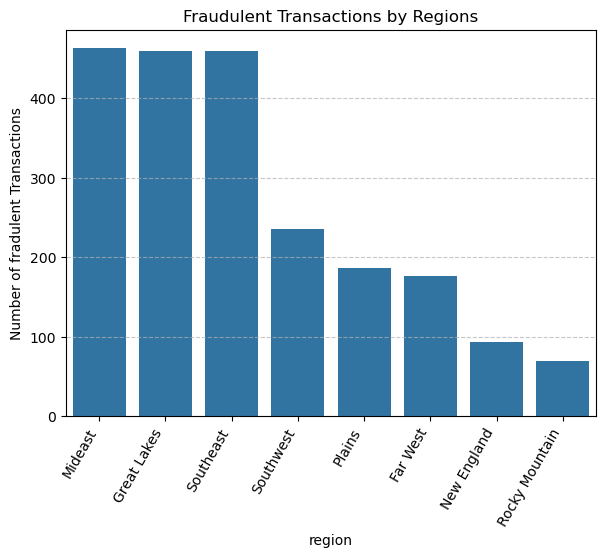

In [22]:
# Fradulent Transactions by Region

sns.barplot(data=region_group_fraud_df, x='region', y='number_of_transactions')

plt.title ('Fraudulent Transactions by Regions')
plt.xlabel('region')
plt.ylabel ('Number of fradulent Transactions')
plt.tight_layout()
plt.xticks (rotation=60, ha="right", va="top")


plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()


In [23]:
# time dataframe
df_time=df.copy()

# Split the trans_date_trans_time in to two columns of trans_date and trans_time
df_time[['trans_date', 'trans_time']]=df_time['trans_date_trans_time'].str.split(' ',expand=True)
df_time.head()


,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,date_dob,dt_trans_date_time,age_years,distance_km,region,trans_date,trans_time
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.986391,-81.200714,0,1968-03-19,2020-06-21 12:14:00,56.116397,1.551148,Southeast,21/06/2020,12:14
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,39.450498,-109.960431,0,1990-01-17,2020-06-21 12:14:00,34.269822,1.666594,Rocky Mountain,21/06/2020,12:14
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.495810,-74.196111,0,1970-10-21,2020-06-21 12:14:00,53.524616,1.387472,Mideast,21/06/2020,12:14
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.812398,-80.883061,0,1987-07-25,2020-06-21 12:15:00,36.754753,1.599663,Southeast,21/06/2020,12:15
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.959148,-85.884734,0,1955-07-06,2020-06-21 12:15:00,68.828726,1.408470,Great Lakes,21/06/2020,12:15


In [24]:
# check the list of columns

df_time.trans_date=pd.to_datetime(df_time.trans_date)
df_time.trans_date_trans_time=pd.to_datetime(df_time.trans_date_trans_time)
# df_time['trans_time']=pd.to_datetime(df_time['trans_time'],format='%H:%M').dt.time
df_time.info()

/var/folders/xb/p21n25fd4mz1zw57zdqm8_n80000gn/T/ipykernel_90902/2585539779.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_time.trans_date=pd.to_datetime(df_time.trans_date)
/var/folders/xb/p21n25fd4mz1zw57zdqm8_n80000gn/T/ipykernel_90902/2585539779.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_time.trans_date_trans_time=pd.to_datetime(df_time.trans_date_trans_time)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  float64       
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [25]:
df_hour = df_time.copy()
df_hour['trans_time'] = pd.to_datetime(df_hour['trans_time'], format='%H:%M')

# Extract the hour from 'trans_time'
df_hour['transaction_hour'] = df_hour['trans_time'].dt.hour

# Group by the transaction hour and count the number of transactions
transaction_counts = df_hour.groupby('transaction_hour').size()

# Reset index to flatten the dataframe and prepare for plotting
transaction_counts = transaction_counts.reset_index(name='count')

# Sort the hours for better visualization
transaction_counts = transaction_counts.sort_values(by='transaction_hour')

transaction_counts

,transaction_hour,count
0,0,18153
1,1,18461
2,2,18140
3,3,18199
4,4,18075
5,5,17917
6,6,18106
7,7,18098
8,8,17993
9,9,18046


# 6.1 TRANSACTION TIME ANALYSIS
What are the bussiest times of day for transactions?

After 11am there is a huge spike in the number of transactions. The noon hour could be due to people being on lunch and visiting the merchants while the the rest of the day is people might be getting off work and visiting the merchants. The drop from 23:00 to 24:00 could be due to lots of places may choose to be closed at midnight.



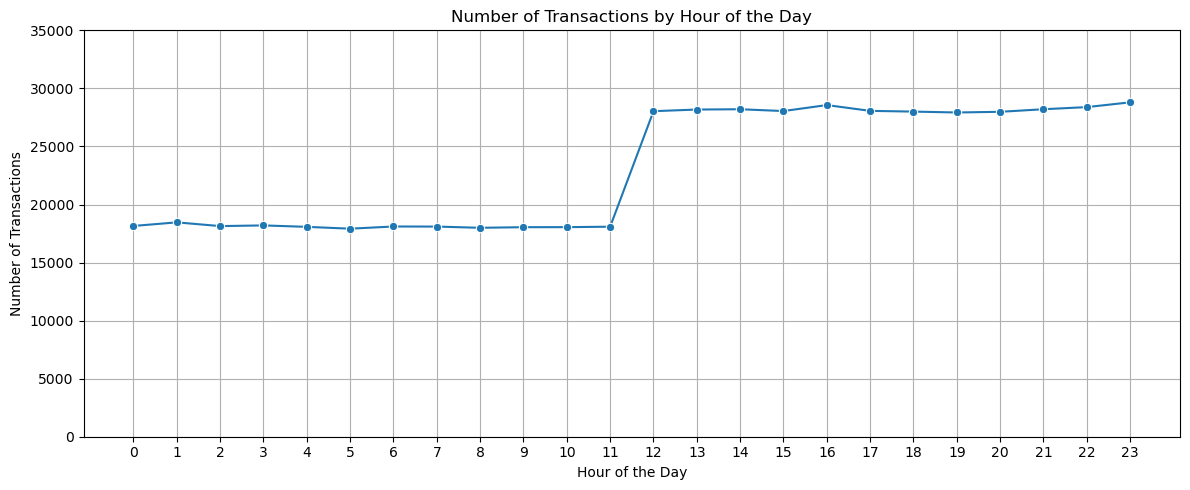

In [26]:
# What are the bussiest times of day for transactions?

# Plot 
plt.figure(figsize=(12, 5))
lineplot = sns.lineplot(data=transaction_counts, x='transaction_hour', y='count', marker='o')  

# Adding labels to each point
# for x, y in transaction_counts.itertuples(index=False):
#     plt.text(x, y + 30, y, horizontalalignment='center', size='small', color='grey', weight='semibold')

plt.title('Number of Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24)) 
plt.ylim(0, 35000)
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [27]:
# find out the day of the week

df_time['weekday']=df_time['trans_date_trans_time'].dt.day_name()

In [28]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  float64       
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [29]:
counts=df_time['weekday'].value_counts()
counts.columns=['weekday', 'count']

# 6.2 TRANSACTION TIME ANALYSIS:
How do transaction volumes vary throughout the week?

Monday, Tuesday and Sunday have the most transactions throughout the week. this coulde be due to all 3 days being the start of week. we can see from the bargraph that Thursday, Friday and Saturday has less transactions. Wednesday had the least transactions. 


Text(0.5, 1.0, 'Transactions per day')

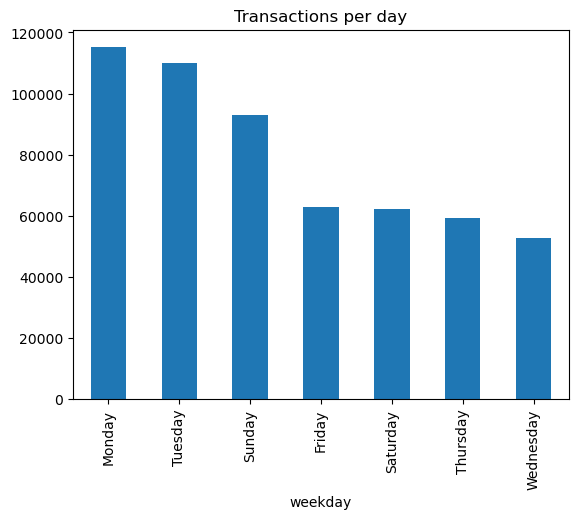

In [30]:
# How do transaction volumes vary throughout the week?

counts.plot(kind='bar')
plt.title('Transactions per day')